In [0]:
from google.colab import drive
drive.mount ('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import zipfile
with zipfile.ZipFile(r'gdrive/My Drive/dataset1_2.zip') as zip_ref:
  zip_ref.extractall('gender')

In [0]:
import numpy as np
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt

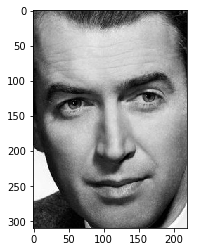

In [0]:
dataset = r'gender/dataset1/train'
Categories = ['man','woman']
for category in Categories:
  path = os.path.join(dataset,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array , cmap = 'gray')
    plt.show()
    break
  break
    

In [0]:
img_array.shape

(198, 134)

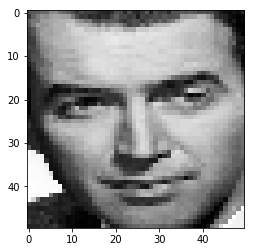

In [0]:
img_size = 50
new_array = cv2.resize(img_array , (img_size , img_size))
plt.imshow(new_array , cmap = 'gray')
plt.show()

In [0]:
training_data = []

def create_training_data():
  for category in Categories:
    path = os.path.join(dataset,category)
    class_num = Categories.index(category)
    try:
      for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array , (img_size , img_size))
        training_data.append([new_array , class_num])
    except Exception as e:
      pass
          
create_training_data()

In [0]:
import random 
random.shuffle(training_data)

In [0]:
training_data[:5][:5]

[[array([[103, 111, 122, ...,  83,  92,  98],
         [143, 107,  60, ...,  87,  91,  89],
         [115, 143, 166, ...,  95,  85,  78],
         ...,
         [ 43,  29,  13, ..., 154, 122, 168],
         [ 50,  33,  21, ..., 134, 128, 183],
         [ 43,  33,  13, ..., 110, 158, 182]], dtype=uint8), 1],
 [array([[52, 42, 26, ..., 33, 29, 20],
         [43, 37, 26, ..., 29, 29, 23],
         [36, 30, 23, ..., 28, 28, 25],
         ...,
         [ 3,  5,  8, ..., 51, 42, 33],
         [ 5,  3,  7, ..., 46, 37, 29],
         [ 5,  4,  6, ..., 41, 31, 26]], dtype=uint8), 1],
 [array([[ 77,  62,  99, ...,  93, 131, 116],
         [ 92,  69,  55, ...,  63,  90,  99],
         [105,  28,  27, ...,  92,  64,  55],
         ...,
         [ 71, 252, 184, ..., 116, 142, 250],
         [250, 223, 193, ..., 104, 245, 253],
         [242, 195, 171, ..., 245, 253, 253]], dtype=uint8), 0],
 [array([[ 14,   9,   5, ...,   8,   9,   8],
         [  8,   2,   6, ...,  11,  23,  15],
         [  4,   

In [0]:
X = []
y = []
for feature,label in training_data:
  X.append(feature)
  y.append(label)
X  = np.array(X).reshape(-1,img_size,img_size,1)


In [0]:
import pickle
pickle_out = open('X_pickle' , 'wb')
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out = open('y_pickle' , 'wb')
pickle.dump(y,pickle_out)
pickle_out.close()


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Activation , MaxPooling2D
from tensorflow.keras.layers import Flatten , Dense
import pickle

In [0]:
pickle_in = open('X_pickle' , 'rb')
X = pickle.load(pickle_in)
pickle_in = open('y_pickle' , 'rb')
y = pickle.load(pickle_in)

In [0]:
X = X/255.0
model = Sequential()
model.add(Conv2D(64,(3,3) , input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3) , input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)



W0828 17:13:52.308998 140363330881408 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0828 17:13:52.474202 140363330881408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1440 samples, validate on 160 samples
Epoch 1/10
1440/1440 [==============================] - 2s 1ms/sample - loss: 0.6795 - acc: 0.5514 - val_loss: 0.6881 - val_acc: 0.5875
Epoch 2/10
1440/1440 [==============================] - 1s 397us/sample - loss: 0.5603 - acc: 0.6979 - val_loss: 0.5940 - val_acc: 0.7000
Epoch 3/10
1440/1440 [==============================] - 1s 390us/sample - loss: 0.4364 - acc: 0.8083 - val_loss: 0.4804 - val_acc: 0.7312
Epoch 4/10
1440/1440 [==============================] - 1s 379us/sample - loss: 0.3307 - acc: 0.8625 - val_loss: 0.4015 - val_acc: 0.8188
Epoch 5/10
1440/1440 [==============================] - 1s 383us/sample - loss: 0.2362 - acc: 0.9139 - val_loss: 0.3491 - val_acc: 0.8625
Epoch 6/10
1440/1440 [==============================] - 1s 372us/sample - loss: 0.1745 - acc: 0.9403 - val_loss: 0.3710 - val_acc: 0.8375
Epoch 7/10
1440/1440 [==============================] - 1s 365us/sample - loss: 0.1603 - acc: 0.9368 - val_loss: 0.3669 - val_a

In [0]:
model.save('32x3-CNN.model')

In [0]:
import cv2
import tensorflow as tf

CATEGORIES = ["m", "w"]


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("32x3-CNN.model")

prediction = model.predict([prepare('download (1).jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[1.]]
w
